In [1]:
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"

font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [2]:
food = pd.read_csv('./data/food.csv')
food = food.drop(['Unnamed: 0','기준년코드'], axis=1)

df = food[['기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명',
     '서비스업종코드', '서비스업종코드명','총직장인구수', '총유동인구수']]
df

,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,서비스업종코드,서비스업종코드명,총직장인구수,총유동인구수
0,4,1,관광특구,1001491,이태원 관광특구,2,중식음식점,5839,1498484
1,4,2,전통시장,1001490,길동복조리시장,9,호프-간이주점,430,873376
2,4,2,전통시장,1001490,길동복조리시장,3,일식음식점,430,873376
3,4,2,전통시장,1001489,둔촌역전통시장,8,분식전문점,224,252938
4,4,2,전통시장,1001489,둔촌역전통시장,2,중식음식점,224,252938
...,...,...,...,...,...,...,...,...,...
10915,1,4,골목상권,1000002,난계로27길,9,호프-간이주점,201,347131
10916,1,4,골목상권,1000002,난계로27길,2,중식음식점,201,347131
10917,1,4,골목상권,1000001,계동길,4,양식음식점,842,336343
10918,1,4,골목상권,1000001,계동길,3,일식음식점,842,336343


<AxesSubplot:xlabel='서비스업종코드명'>

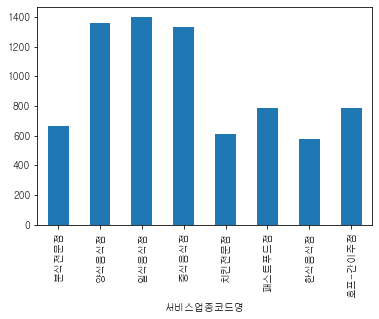

In [3]:
df['총직장인구수'].groupby(df['서비스업종코드명']).mean().plot(kind='bar')

<AxesSubplot:xlabel='상권구분코드명'>

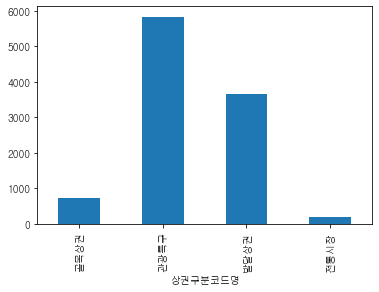

In [4]:
df['총직장인구수'].groupby(df['상권구분코드명']).mean().plot(kind='bar')

In [5]:
food.filter(regex='총').columns

Index(['총직장인구수', '총유동인구수'], dtype='object')

In [6]:
# 매출로도 충분히 설명되므로 유동인구 안따져도 될듯
age = food.filter(regex='유동인구').filter(regex='연령대').iloc[:,:6]

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '연령대10유동인구수'),
  Text(1, 0, '연령대20유동인구수'),
  Text(2, 0, '연령대30유동인구수'),
  Text(3, 0, '연령대40유동인구수'),
  Text(4, 0, '연령대50유동인구수'),
  Text(5, 0, '연령대60이상유동인구수')])

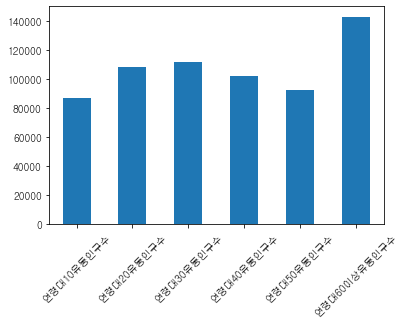

In [7]:
age.mean().plot(kind='bar')
plt.xticks(rotation=45)

In [8]:
food.filter(regex='금액')

,분기당매출금액,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액,...,시간대17~21매출금액,시간대21~24매출금액,남성매출금액,여성매출금액,연령대10매출금액,연령대20매출금액,연령대30매출금액,연령대40매출금액,연령대50매출금액,연령대60이상매출금액
0,698763765.0,491071651.0,207692114.0,59816260,90101280.0,104687782,104154673,132311656,146617240,61074874,...,353866692.0,82780381,315242295.0,301972763.0,3095411,290537240,173082269,60435617.0,68962518,21102000
1,18714146.0,14964993.0,3749153.0,2656026,1558383.0,4273131,4128585,2348868,1969435,1779718,...,5917338.0,4756456,16131956.0,2582190.0,90341,2776921,2005760,3602977.0,4132803,6105344
2,56306117.0,35033918.0,21272199.0,0,5390327.0,7414111,8846819,13382661,13421210,7850989,...,29572917.0,14789672,33963687.0,22342430.0,0,8028942,6975143,23599788.0,10505172,7197072
3,188197882.0,134617114.0,53580768.0,24283662,23815361.0,28566718,29191416,28759957,27961909,25618859,...,66001561.0,23428418,105987864.0,79794767.0,4304316,31847998,37799195,43516606.0,43538054,24776462
4,8688988.0,5304923.0,3384065.0,1443869,1260160.0,1198925,541450,860519,2178693,1205372,...,2381737.0,638138,6294872.0,2071824.0,0,1268281,1387708,2155082.0,2466183,1089443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,121999015.0,92508175.0,29490840.0,9764079,21619686.0,25647582,15624388,19852440,18843913,10646927,...,10850183.0,66533211,66624785.0,49575984.0,732515,50853485,33396589,17393042.0,11162118,2663017
10916,84432390.0,58062022.0,26370368.0,10409282,11584076.0,14489121,10331519,11248024,13261559,13108809,...,22090564.0,594340,44433861.0,23901357.0,327721,8245774,16627635,14072528.0,20443632,8617930
10917,156728306.0,94275028.0,62453278.0,11213200,18582308.0,17284154,19631475,27563891,31432604,31020674,...,77430577.0,1278478,58274895.0,75726743.0,96341,49458665,39186870,17522937.0,20924446,6812377
10918,55484866.0,46837834.0,8647032.0,6794759,10280121.0,9847923,9122449,10792582,8647032,0,...,14049497.0,19106207,27143276.0,19725428.0,0,4898312,10530729,11958404.0,14016411,5464850


In [9]:
!pip install seaborn

You should consider upgrading via the 'c:\users\82102\anaconda3\python.exe -m pip install --upgrade pip' command.


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '월요일매출금액'),
  Text(1, 0, '화요일매출금액'),
  Text(2, 0, '수요일매출금액'),
  Text(3, 0, '목요일매출금액'),
  Text(4, 0, '금요일매출금액'),
  Text(5, 0, '토요일매출금액'),
  Text(6, 0, '일요일매출금액')])

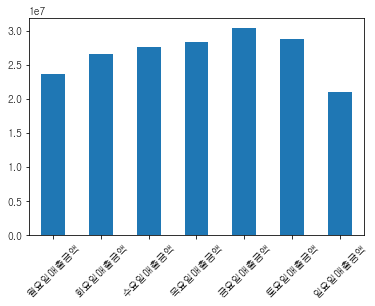

In [10]:
import seaborn as sns
day = food.filter(regex='요일매출금액')
day.mean().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '시간대건수~06매출건수'),
  Text(1, 0, '시간대건수~11매출건수'),
  Text(2, 0, '시간대건수~14매출건수'),
  Text(3, 0, '시간대건수~17매출건수'),
  Text(4, 0, '시간대건수~21매출건수'),
  Text(5, 0, '시간대건수~24매출건수')])

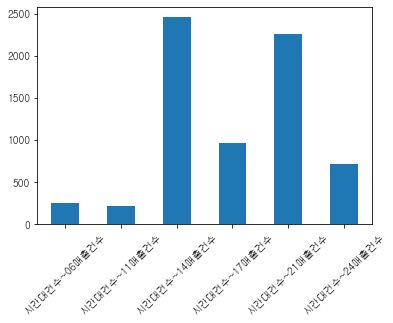

In [11]:
food.filter(regex='시간대건수').mean().plot(kind='bar')
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, '주중매출금액'), Text(1, 0, '주말매출금액')])

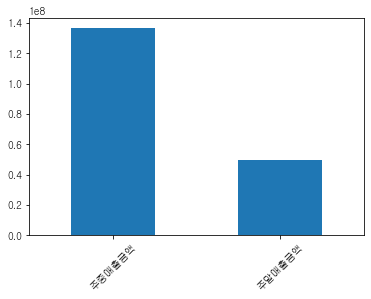

In [12]:
food[['주중매출금액','주말매출금액']].mean().plot(kind='bar')
plt.xticks(rotation=45)

In [13]:
food.columns

Index(['기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드', '서비스업종코드명',
       '분기당매출금액', '분기당매출건수', '주중매출금액',
       ...
       '여성연령대60이상토요일시간대3유동인구수', '여성연령대60이상토요일시간대4유동인구수',
       '여성연령대60이상토요일시간대5유동인구수', '여성연령대60이상토요일시간대6유동인구수',
       '여성연령대60이상일요일시간대1유동인구수', '여성연령대60이상일요일시간대2유동인구수',
       '여성연령대60이상일요일시간대3유동인구수', '여성연령대60이상일요일시간대4유동인구수',
       '여성연령대60이상일요일시간대5유동인구수', '여성연령대60이상일요일시간대6유동인구수'],
      dtype='object', length=624)

In [14]:
tem = pd.read_csv('./data/상권_행정동코드.csv')
tem

,상권_코드,행정동_코드
0,1001453,11620585
1,1001454,11620595
2,1001474,11680650
3,1001475,11680670
4,1001412,11500590
...,...,...
1491,1001044,11650520
1492,1001030,11650651
1493,1001031,11620645
1494,1001032,11620645


In [15]:
tem.columns = tem.columns.str.replace('_','')

In [16]:
f = pd.merge(food, tem, on=['상권코드'])

In [17]:
f.to_csv('./data/f.csv', encoding='utf-8-sig')

In [18]:
f.filter(regex='유동인구').iloc[:,3:]

,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대50유동인구수,연령대60이상유동인구수,시간대1유동인구수,시간대2유동인구수,시간대3유동인구수,시간대4유동인구수,...,여성연령대60이상토요일시간대3유동인구수,여성연령대60이상토요일시간대4유동인구수,여성연령대60이상토요일시간대5유동인구수,여성연령대60이상토요일시간대6유동인구수,여성연령대60이상일요일시간대1유동인구수,여성연령대60이상일요일시간대2유동인구수,여성연령대60이상일요일시간대3유동인구수,여성연령대60이상일요일시간대4유동인구수,여성연령대60이상일요일시간대5유동인구수,여성연령대60이상일요일시간대6유동인구수
0,81086,356004,362324,240934,198262,259873,314538,281367,205108,220072,...,2646,2801,3716,2462,4708,3848,2565,2598,3332,2318
1,73467,344490,355112,239018,191427,241778,294234,266017,197622,215015,...,2475,2567,3472,2306,4257,3591,2384,2452,3276,2238
2,100143,510610,425748,261784,213589,277382,373968,302727,227633,254891,...,2788,3017,4234,2671,4714,4009,2809,2923,3896,2517
3,144022,94019,114971,136136,142977,241249,238926,172232,97534,100785,...,2478,2523,3412,2641,5460,4288,2493,2562,3545,2713
4,144022,94019,114971,136136,142977,241249,238926,172232,97534,100785,...,2478,2523,3412,2641,5460,4288,2493,2562,3545,2713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,59655,396097,232353,125812,101076,135278,224246,192598,122925,136895,...,1650,1876,2335,1292,1618,1566,1402,1751,2210,1194
10916,31035,44391,57275,43201,36823,42148,60340,52884,35043,34273,...,414,413,541,433,821,645,393,385,526,423
10917,44067,226948,91240,44911,46270,65663,148791,108851,58355,55464,...,637,626,810,678,1526,1181,656,607,832,680
10918,98307,223548,248731,188704,149336,165804,151507,227802,189833,190882,...,1573,1586,2036,1268,2067,2008,1475,1533,1992,1281


In [19]:
#f=f.drop(f.filter(regex='유동인구').iloc[:,3:].columns, axis=1)
#f=f.drop(f.filter(regex='세대수'), axis=1)

In [20]:
f.columns

Index(['기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드', '서비스업종코드명',
       '분기당매출금액', '분기당매출건수', '주중매출금액',
       ...
       '여성연령대60이상토요일시간대4유동인구수', '여성연령대60이상토요일시간대5유동인구수',
       '여성연령대60이상토요일시간대6유동인구수', '여성연령대60이상일요일시간대1유동인구수',
       '여성연령대60이상일요일시간대2유동인구수', '여성연령대60이상일요일시간대3유동인구수',
       '여성연령대60이상일요일시간대4유동인구수', '여성연령대60이상일요일시간대5유동인구수',
       '여성연령대60이상일요일시간대6유동인구수', '행정동코드'],
      dtype='object', length=625)

In [21]:
f.shape

(10920, 625)

In [22]:
f['상권구분코드명'].unique()

array(['관광특구', '전통시장', '발달상권', '골목상권'], dtype=object)

In [23]:
f['서비스업종코드명'].unique()

array(['중식음식점', '호프-간이주점', '일식음식점', '한식음식점', '분식전문점', '양식음식점', '치킨전문점',
       '패스트푸드점'], dtype=object)

In [24]:
d = f.drop(['상권구분코드','상권코드','서비스업종코드'], axis=1)

## 서비스업종코드 별로 머신러닝을 돌려볼까 하고 일단 정리해봄! ( 넘겨도 상관없음 )

In [25]:
chi = d[d['서비스업종코드명']=='중식음식점']
hof = d[d['서비스업종코드명']=='호프-간이주점']
jpn = d[d['서비스업종코드명']=='일식음식점']
kor = d[d['서비스업종코드명']=='한식음식점']
tto = d[d['서비스업종코드명']=='분식전문점']
wes = d[d['서비스업종코드명']=='양식음식점']
chicken = d[d['서비스업종코드명']=='치킨전문점']
fast = d[d['서비스업종코드명']=='패스트푸드점']

## 상권 별로 머신러닝을 돌려볼까?

In [26]:
f[f['상권구분코드명']=='발달상권']
f[f['상권구분코드명']=='골목상권']
f[f['상권구분코드명']=='전통시장']
f[f['상권구분코드명']=='관광특구']

,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,서비스업종코드,서비스업종코드명,분기당매출금액,분기당매출건수,주중매출금액,...,여성연령대60이상토요일시간대4유동인구수,여성연령대60이상토요일시간대5유동인구수,여성연령대60이상토요일시간대6유동인구수,여성연령대60이상일요일시간대1유동인구수,여성연령대60이상일요일시간대2유동인구수,여성연령대60이상일요일시간대3유동인구수,여성연령대60이상일요일시간대4유동인구수,여성연령대60이상일요일시간대5유동인구수,여성연령대60이상일요일시간대6유동인구수,행정동코드
0,4,1,관광특구,1001491,이태원 관광특구,2,중식음식점,698763765.0,20406,491071651.0,...,2801,3716,2462,4708,3848,2565,2598,3332,2318,11170650
1,3,1,관광특구,1001491,이태원 관광특구,2,중식음식점,790498332.0,22279,559257373.0,...,2567,3472,2306,4257,3591,2384,2452,3276,2238,11170650
2,1,1,관광특구,1001491,이태원 관광특구,2,중식음식점,919304151.0,25404,658962082.0,...,3017,4234,2671,4714,4009,2809,2923,3896,2517,11170650


## 머신러닝전에 상관관계 큰 칼럼 찾아보기 위해서 전처리

In [27]:
# 처음에 유동인구랑 몇개 빼자는 말이 있어서 그거 뺀 자료들임 (아래꺼가 더 칼럼 많음!)
X = f[['기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드', '서비스업종코드명', '점포수', '유사업종점포수', '개업율', '개업점포수', '폐업률', '폐업점포수',
       '프랜차이즈점포수', '총직장인구수', '남성직장인구수', '여성직장인구수', '연령대10직장인구수', '연령대20직장인구수',
       '연령대30직장인구수', '연령대40직장인구수', '연령대50직장인구수', '연령대60이상직장인구수',
       '남성연령대10직장인구수', '남성연령대20직장인구수', '남성연령대30직장인구수', '남성연령대40직장인구수',
       '남성연령대50직장인구수', '남성연령대60이상직장인구수', '여성연령대10직장인구수', '여성연령대20직장인구수',
       '여성연령대30직장인구수', '여성연령대40직장인구수', '여성연령대50직장인구수', '여성연령대60이상직장인구수',
       '아파트단지수', '아파트평균면적', '아파트평균시가', '총유동인구수', '남성유동인구수', '여성유동인구수',
       '행정동코드']]

Y = f[['분기당매출금액', '분기당매출건수', '주중매출금액', '주말매출금액', '월요일매출금액', '화요일매출금액',
       '수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액', '시간대00~06매출금액',
       '시간대06~11매출금액', '시간대11~14매출금액', '시간대14~17매출금액', '시간대17~21매출금액',
       '시간대21~24매출금액', '남성매출금액', '여성매출금액', '연령대10매출금액', '연령대20매출금액',
       '연령대30매출금액', '연령대40매출금액', '연령대50매출금액', '연령대60이상매출금액', '주중매출건수',
       '주말매출건수', '월요일매출건수', '화요일매출건수', '수요일매출건수', '목요일매출건수', '금요일매출건수',
       '토요일매출건수', '일요일매출건수', '시간대건수~06매출건수', '시간대건수~11매출건수', '시간대건수~14매출건수',
       '시간대건수~17매출건수', '시간대건수~21매출건수', '시간대건수~24매출건수', '남성매출건수', '여성매출건수',
       '연령대10매출건수', '연령대20매출건수', '연령대30매출건수', '연령대40매출건수', '연령대50매출건수',
       '연령대60이상매출건수']]

In [28]:
# 한 건당 금액이라는 새로운 칼럼추가 해봤음
f['분기당건수별금액'] = f['분기당매출금액']/f['분기당매출건수']

In [29]:
f.columns

Index(['기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드', '서비스업종코드명',
       '분기당매출금액', '분기당매출건수', '주중매출금액',
       ...
       '여성연령대60이상토요일시간대5유동인구수', '여성연령대60이상토요일시간대6유동인구수',
       '여성연령대60이상일요일시간대1유동인구수', '여성연령대60이상일요일시간대2유동인구수',
       '여성연령대60이상일요일시간대3유동인구수', '여성연령대60이상일요일시간대4유동인구수',
       '여성연령대60이상일요일시간대5유동인구수', '여성연령대60이상일요일시간대6유동인구수', '행정동코드', '분기당건수별금액'],
      dtype='object', length=626)

In [30]:
# 유동인구 관련 칼럼 이름 다 확인해보고자 프린트 했음
for i in f.filter(regex='유동인구').iloc[:,3:].columns:
    print(i)

연령대10유동인구수
연령대20유동인구수
연령대30유동인구수
연령대40유동인구수
연령대50유동인구수
연령대60이상유동인구수
시간대1유동인구수
시간대2유동인구수
시간대3유동인구수
시간대4유동인구수
시간대5유동인구수
시간대6유동인구수
월요일유동인구수
화요일유동인구수
수요일유동인구수
목요일유동인구수
금요일유동인구수
토요일유동인구수
일요일유동인구수
남성연령대10월요일시간대1유동인구수
남성연령대10월요일시간대2유동인구수
남성연령대10월요일시간대3유동인구수
남성연령대10월요일시간대4유동인구수
남성연령대10월요일시간대5유동인구수
남성연령대10월요일시간대6유동인구수
남성연령대10화요일시간대1유동인구수
남성연령대10화요일시간대2유동인구수
남성연령대10화요일시간대3유동인구수
남성연령대10화요일시간대4유동인구수
남성연령대10화요일시간대5유동인구수
남성연령대10화요일시간대6유동인구수
남성연령대10수요일시간대1유동인구수
남성연령대10수요일시간대2유동인구수
남성연령대10수요일시간대3유동인구수
남성연령대10수요일시간대4유동인구수
남성연령대10수요일시간대5유동인구수
남성연령대10수요일시간대6유동인구수
남성연령대10목요일시간대1유동인구수
남성연령대10목요일시간대2유동인구수
남성연령대10목요일시간대3유동인구수
남성연령대10목요일시간대4유동인구수
남성연령대10목요일시간대5유동인구수
남성연령대10목요일시간대6유동인구수
남성연령대10금요일시간대1유동인구수
남성연령대10금요일시간대2유동인구수
남성연령대10금요일시간대3유동인구수
남성연령대10금요일시간대4유동인구수
남성연령대10금요일시간대5유동인구수
남성연령대10금요일시간대6유동인구수
남성연령대10토요일시간대1유동인구수
남성연령대10토요일시간대2유동인구수
남성연령대10토요일시간대3유동인구수
남성연령대10토요일시간대4유동인구수
남성연령대10토요일시간대5유동인구수
남성연령대10토요일시간대6유동인구수
남성연령대10일요일시간대1유동인구수
남성연령대10일요일시간대2유동인구수
남성연령대10일요일시간대3유동인구수
남성연령대10일요일시간대4유동인구수
남성연령대10일요

## Heatmap

In [31]:
# 일단 전체 상관관계 표 만듦
cor = f.corr()

In [32]:
# 매출 관련자료를 모두 y에, 나머지는 x에 남겨둠(매출과 매출끼리는 상관관계가 너무 높아서 방해됨)
y = cor.filter(regex='매출').columns
x = cor[cor.columns.difference(y)].columns

In [33]:
cor_xy = cor.loc[x, y]

In [34]:
cor_xy

,분기당매출금액,분기당매출건수,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,...,시간대건수~21매출건수,시간대건수~24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수
개업율,0.003815,0.030817,0.003475,0.004327,0.005853,0.003469,0.002580,0.002990,0.002669,0.003541,...,0.037165,0.002179,0.026483,0.040767,0.040310,0.033317,0.031864,0.032606,0.026557,0.016744
개업점포수,0.268849,0.272363,0.260651,0.264936,0.260069,0.255922,0.256037,0.257200,0.258875,0.264134,...,0.282662,0.201554,0.273512,0.263967,0.121705,0.219642,0.247316,0.257485,0.275815,0.243279
금요일유동인구수,-0.010815,-0.002326,-0.009218,-0.013875,-0.001235,-0.011942,-0.011791,-0.009675,-0.009982,-0.014791,...,-0.004233,0.018725,0.010022,-0.015174,0.027111,0.009141,0.006709,-0.000872,-0.012247,-0.020673
기준분기코드,-0.008134,-0.014484,-0.009163,-0.004774,-0.009785,-0.009383,-0.008766,-0.003071,-0.013980,-0.001244,...,-0.003662,-0.060480,-0.015186,-0.013708,0.027279,-0.017115,-0.028700,-0.014190,-0.002552,0.003795
남성연령대10금요일시간대1유동인구수,-0.108488,-0.097366,-0.117176,-0.076475,-0.110637,-0.118535,-0.118158,-0.117917,-0.113500,-0.081594,...,-0.075444,-0.055336,-0.083861,-0.093945,0.042403,-0.122773,-0.115791,-0.050289,-0.040811,-0.046757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
폐업률,-0.019706,-0.011902,-0.018689,-0.020476,-0.017879,-0.019314,-0.017733,-0.018512,-0.018841,-0.020132,...,-0.012063,-0.021914,-0.013474,-0.008098,0.002141,-0.001904,-0.006487,-0.012984,-0.016571,-0.021315
폐업점포수,0.206577,0.204340,0.204259,0.193473,0.205723,0.199361,0.202154,0.201013,0.201510,0.193349,...,0.200616,0.160684,0.206208,0.191709,0.081583,0.161594,0.190637,0.188941,0.203345,0.177132
프랜차이즈점포수,0.167950,0.192322,0.160421,0.171613,0.159122,0.159879,0.154949,0.157953,0.160724,0.169433,...,0.205656,0.165507,0.195949,0.188147,0.108912,0.167662,0.175846,0.188050,0.190847,0.154814
행정동코드,0.006918,0.002225,0.019960,-0.026804,0.027933,0.024453,0.020608,0.018174,0.009842,-0.024525,...,-0.012001,-0.040139,-0.003334,-0.012552,0.008015,-0.030892,0.019257,0.014244,-0.018088,-0.022864


<AxesSubplot:>

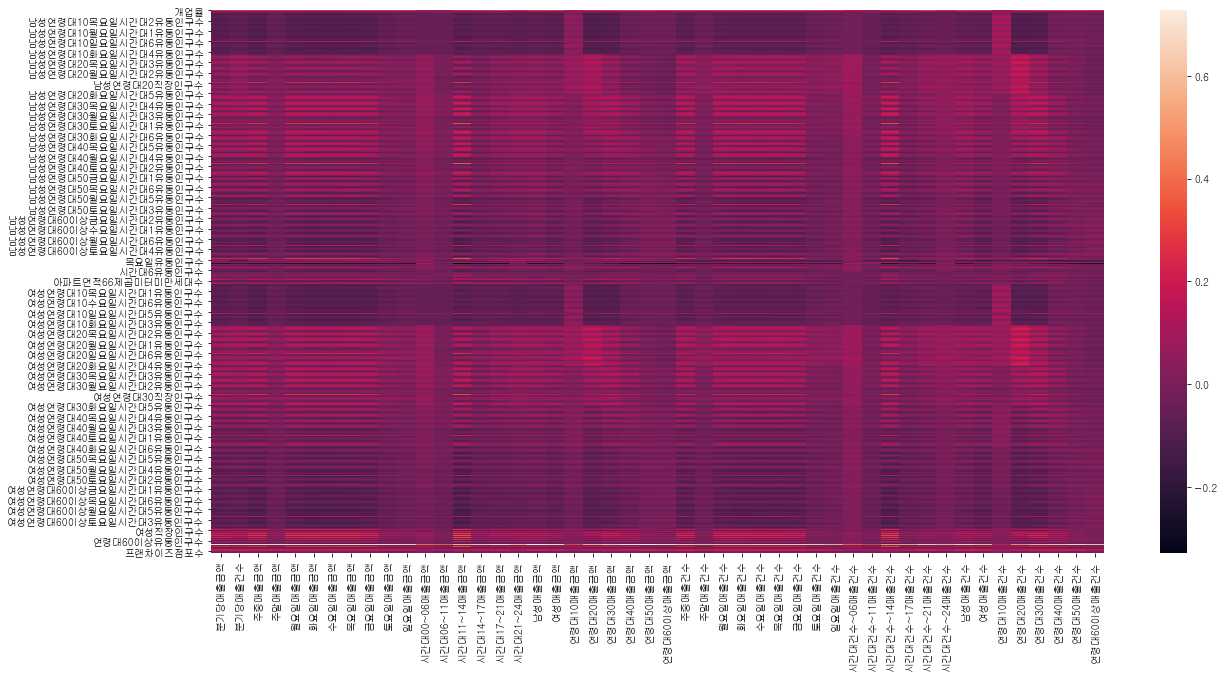

In [35]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor_xy)

In [36]:
cor_xy[['주중매출금액']].sort_values(by='주중매출금액',ascending=False)[:20]

,주중매출금액
점포수,0.685146
유사업종점포수,0.684368
연령대30직장인구수,0.276782
남성연령대40직장인구수,0.271926
남성연령대30직장인구수,0.268662
여성연령대30직장인구수,0.266698
남성직장인구수,0.261889
개업점포수,0.260651
총직장인구수,0.257281
연령대40직장인구수,0.250382


In [37]:
cor_xy[['주말매출금액']].sort_values(by='주말매출금액', ascending=False)[:20]

,주말매출금액
점포수,0.665219
유사업종점포수,0.665046
개업점포수,0.264936
폐업점포수,0.193473
프랜차이즈점포수,0.171613
아파트평균시가,0.114795
아파트평균면적,0.105333
여성연령대30직장인구수,0.103080
여성연령대20토요일시간대4유동인구수,0.091914
연령대30직장인구수,0.090521


<AxesSubplot:>

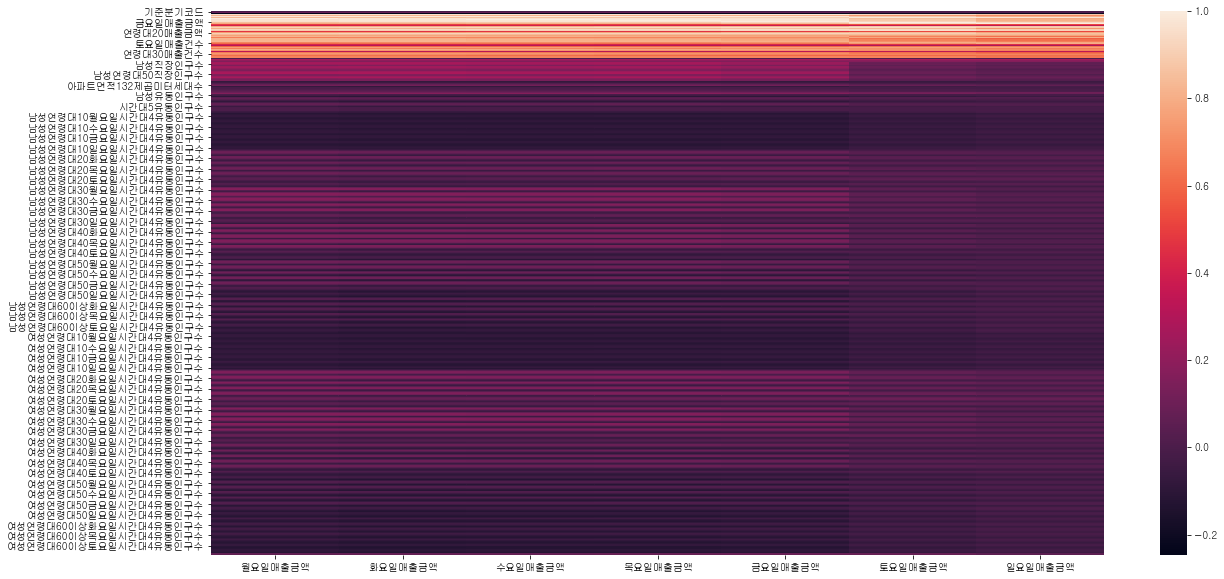

In [38]:
cor_d = cor[['월요일매출금액', '화요일매출금액','수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액']]

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor_d)

In [39]:
f.filter(regex='세대수')

,아파트면적66제곱미터미만세대수,아파트면적66제곱미터세대수,아파트면적99제곱미터세대수,아파트면적132제곱미터세대수,아파트면적165제곱미터세대수,아파트가격1억미만세대수,아파트가격1억세대수,아파트가격2억세대수,아파트가격3억세대수,아파트가격4억세대수,아파트가격5억세대수,아파트가격6억이상세대수
0,343.0,198.0,55.0,64.0,61.0,14.0,87.0,98.0,221.0,123.0,91.0,87.0
1,343.0,198.0,55.0,64.0,61.0,14.0,87.0,98.0,221.0,123.0,91.0,87.0
2,343.0,198.0,55.0,64.0,61.0,14.0,87.0,98.0,221.0,123.0,91.0,87.0
3,410.0,387.0,0.0,2.0,17.0,24.0,322.0,144.0,164.0,161.0,0.0,1.0
4,410.0,387.0,0.0,2.0,17.0,24.0,322.0,144.0,164.0,161.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10915,299.0,1.0,0.0,0.0,0.0,204.0,85.0,10.0,1.0,0.0,0.0,0.0
10916,73.0,9.0,2.0,0.0,0.0,13.0,27.0,35.0,7.0,2.0,0.0,0.0
10917,787.0,35.0,25.0,0.0,0.0,245.0,516.0,79.0,7.0,0.0,0.0,0.0
10918,184.0,142.0,4.0,0.0,0.0,6.0,47.0,45.0,84.0,119.0,29.0,0.0


In [40]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10920 entries, 0 to 10919
Columns: 626 entries, 기준분기코드 to 분기당건수별금액
dtypes: float64(23), int64(600), object(3)
memory usage: 52.2+ MB


In [41]:
X_total = f[['기준분기코드', '상권구분코드', '상권코드', '서비스업종코드', '점포수', '유사업종점포수', '개업율', '개업점포수', '폐업률', '폐업점포수',
       '프랜차이즈점포수', '총직장인구수', '남성직장인구수', '여성직장인구수', '연령대10직장인구수', '연령대20직장인구수',
       '연령대30직장인구수', '연령대40직장인구수', '연령대50직장인구수', '연령대60이상직장인구수',
       '남성연령대10직장인구수', '남성연령대20직장인구수', '남성연령대30직장인구수', '남성연령대40직장인구수',
       '남성연령대50직장인구수', '남성연령대60이상직장인구수', '여성연령대10직장인구수', '여성연령대20직장인구수',
       '여성연령대30직장인구수', '여성연령대40직장인구수', '여성연령대50직장인구수', '여성연령대60이상직장인구수',
       '아파트단지수', '아파트평균면적', '아파트평균시가', '총유동인구수', '남성유동인구수', '여성유동인구수',
       '행정동코드']]

Y_total = f[['분기당매출금액', '분기당매출건수', '주중매출금액', '주말매출금액', '월요일매출금액', '화요일매출금액',
       '수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액', '시간대00~06매출금액',
       '시간대06~11매출금액', '시간대11~14매출금액', '시간대14~17매출금액', '시간대17~21매출금액',
       '시간대21~24매출금액', '남성매출금액', '여성매출금액', '연령대10매출금액', '연령대20매출금액',
       '연령대30매출금액', '연령대40매출금액', '연령대50매출금액', '연령대60이상매출금액', '주중매출건수',
       '주말매출건수', '월요일매출건수', '화요일매출건수', '수요일매출건수', '목요일매출건수', '금요일매출건수',
       '토요일매출건수', '일요일매출건수', '시간대건수~06매출건수', '시간대건수~11매출건수', '시간대건수~14매출건수',
       '시간대건수~17매출건수', '시간대건수~21매출건수', '시간대건수~24매출건수', '남성매출건수', '여성매출건수',
       '연령대10매출건수', '연령대20매출건수', '연령대30매출건수', '연령대40매출건수', '연령대50매출건수',
       '연령대60이상매출건수']]


cor1 = cor.loc[X_total.columns, Y_total.columns]

<AxesSubplot:>

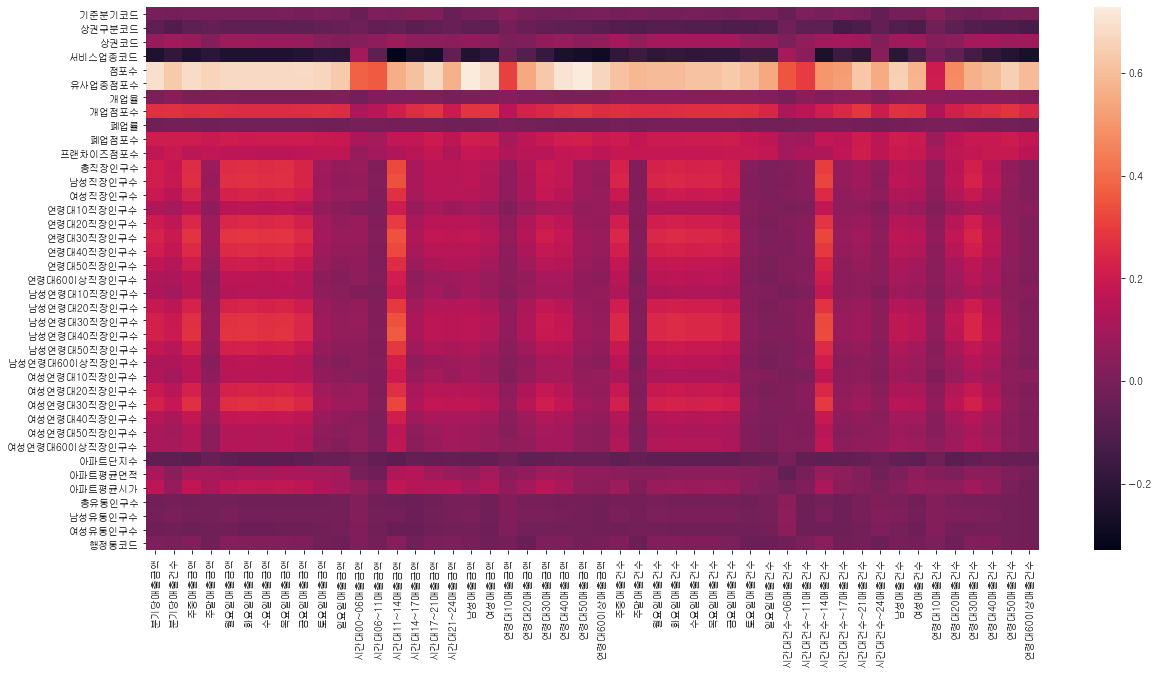

In [42]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor1)

In [66]:
cor_day = cor1[['월요일매출금액', '화요일매출금액','수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액']]

<AxesSubplot:>

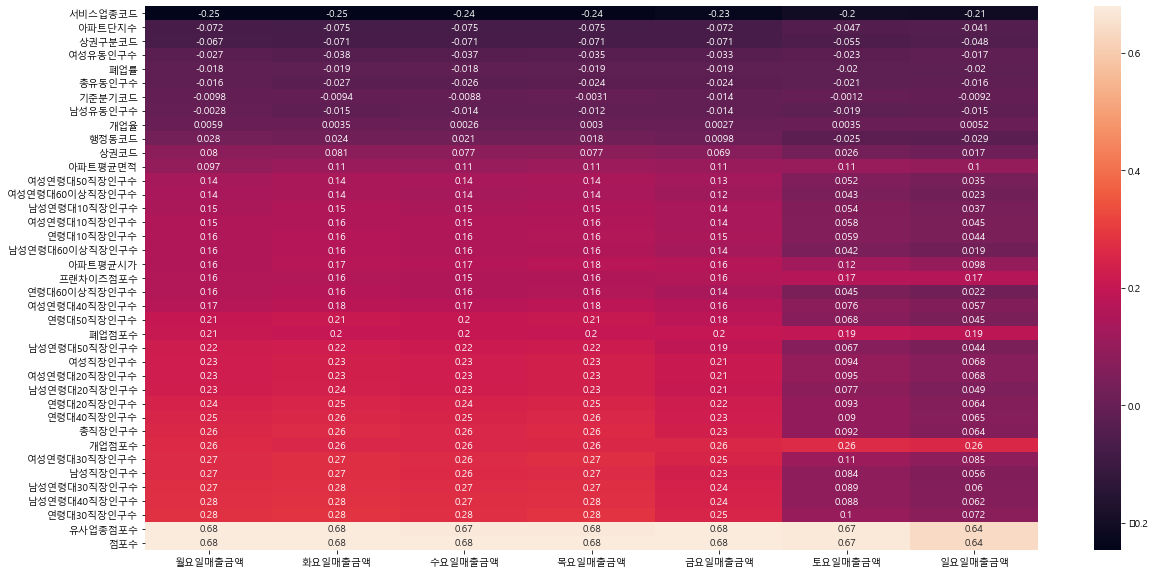

In [72]:
plt.rcParams['font.family'] = 'Malgun Gothic'
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor_day.sort_values(by='월요일매출금액'), annot=True)

In [70]:
for col in cor_day.columns:
    globals()[f'{col[0]}'] = cor_day[col].sort_values(ascending=False)[:20].index.tolist()

for col in cor_day.columns:
    globals()[f'{col[0]}'] = cor_day[col].sort_values(ascending=False)[:20]

In [71]:
월

점포수             0.677238
유사업종점포수         0.676489
연령대30직장인구수      0.278576
남성연령대40직장인구수    0.276522
남성연령대30직장인구수    0.272312
남성직장인구수         0.265886
여성연령대30직장인구수    0.265455
개업점포수           0.260069
총직장인구수          0.258418
연령대40직장인구수      0.250727
연령대20직장인구수      0.244365
남성연령대20직장인구수    0.230157
여성연령대20직장인구수    0.226913
여성직장인구수         0.225800
남성연령대50직장인구수    0.221466
폐업점포수           0.205723
연령대50직장인구수      0.205419
여성연령대40직장인구수    0.170830
연령대60이상직장인구수    0.159419
프랜차이즈점포수        0.159122
Name: 월요일매출금액, dtype: float64

# 머신러닝 돌리기

In [47]:
chi = d[d['서비스업종코드명']=='중식음식점']
hof = d[d['서비스업종코드명']=='호프-간이주점']
jpn = d[d['서비스업종코드명']=='일식음식점']
kor = d[d['서비스업종코드명']=='한식음식점']
tto = d[d['서비스업종코드명']=='분식전문점']
wes = d[d['서비스업종코드명']=='양식음식점']
chicken = d[d['서비스업종코드명']=='치킨전문점']
fast = d[d['서비스업종코드명']=='패스트푸드점']

In [48]:
import numpy as np

In [49]:
X

,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,서비스업종코드,서비스업종코드명,점포수,유사업종점포수,개업율,...,여성연령대40직장인구수,여성연령대50직장인구수,여성연령대60이상직장인구수,아파트단지수,아파트평균면적,아파트평균시가,총유동인구수,남성유동인구수,여성유동인구수,행정동코드
0,4,1,관광특구,1001491,이태원 관광특구,2,중식음식점,15,15,7,...,513,227,83,71,82,409473123,1498484,764080,734405,11170650
1,3,1,관광특구,1001491,이태원 관광특구,2,중식음식점,15,15,0,...,513,227,83,71,82,409473123,1445292,737507,707785,11170650
2,1,1,관광특구,1001491,이태원 관광특구,2,중식음식점,16,16,6,...,513,227,83,71,82,409473123,1789259,926119,863139,11170650
3,4,2,전통시장,1001490,길동복조리시장,9,호프-간이주점,2,2,0,...,38,59,36,37,62,183067389,873376,396767,476609,11740685
4,4,2,전통시장,1001490,길동복조리시장,3,일식음식점,6,6,17,...,38,59,36,37,62,183067389,873376,396767,476609,11740685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10915,1,3,발달상권,1001040,서울 관악구 신림역_3,3,일식음식점,2,2,0,...,5,13,11,16,25,142454939,1050271,547583,502688,11620695
10916,1,3,발달상권,1001036,문정역,7,치킨전문점,1,1,0,...,10,9,3,10,52,214196190,254871,126210,128662,11710641
10917,1,4,골목상권,1000138,능동로19길,4,양식음식점,2,2,0,...,12,9,3,20,27,116870336,519100,245208,273891,11215710
10918,1,4,골목상권,1000120,왕십리로6길,8,분식전문점,19,21,14,...,51,39,21,11,50,255217692,1074429,539375,535055,11200660


In [50]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression#, Ridge, Lasso

X=chi[월]
Y=chi['월요일매출금액']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

pred = lr_model.predict(X_test)

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle

rmsle(y_test ,pred)

RMSLE: 3.4339


3.433863400726919

In [51]:
def get_top5_error_data(y_test, pred):
    # DataFrame에 컬럼들로 실제 매출과 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    # 예측값(pred)을 'predicted_count' 컬럼에 넣기
    result_df['predicted_count']= np.round(pred)
    # 실제값과 예측값과의 차이를 'diff' 컬럼에 넣기
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:5])
    
get_top5_error_data(y_test,pred)

     real_count  predicted_count         diff
19    338735764       51312381.0  287423383.0
94    236132580       91812093.0  144320487.0
656   140123017       21889277.0  118233740.0
508    60094390      166588669.0  106494279.0
469    65313570      166588669.0  101275099.0


<AxesSubplot:>

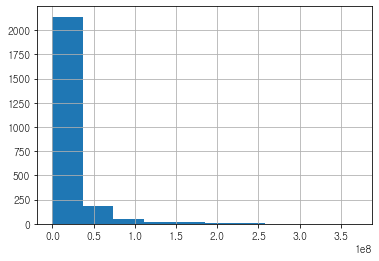

In [52]:
Y.hist()

<AxesSubplot:>

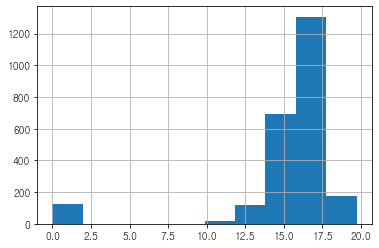

In [53]:
y_log = np.log1p(Y)
y_log.hist()

In [54]:
# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=0)

In [55]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        # 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
        y_test = np.expm1(y_test)
        # 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    rmsle(y_test, pred)

In [56]:
lr_model_with_log = LinearRegression()
get_model_predict(lr_model_with_log, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 3.3515


### 선형회귀모델에서 가장 영향을 많이 주는 종속변수 알아보기

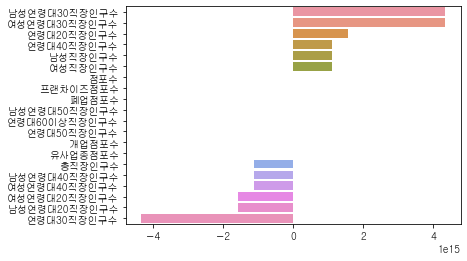

In [57]:
def plotFeatureList(model, X):
    coef = pd.Series(model.coef_, index=X.columns)
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

plotFeatureList(lr_model, X)

In [58]:
!pip install xgboost

You should consider upgrading via the 'c:\users\82102\anaconda3\python.exe -m pip install --upgrade pip' command.


In [59]:
!pip install lightgbm

You should consider upgrading via the 'c:\users\82102\anaconda3\python.exe -m pip install --upgrade pip' command.


In [60]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=0)

# LinearRegression, 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=500)
gbm_model = GradientBoostingRegressor(n_estimators=500)
xgb_model = XGBRegressor(n_estimators=500)
lgbm_model = LGBMRegressor(n_estimators=500)
lassoReg = Lasso(alpha=0.3, normalize=True)

model_list = [lr_model, rf_model, gbm_model, xgb_model, lgbm_model, lassoReg]
for model in model_list:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 3.3515
### RandomForestRegressor ###
RMSLE: 2.3125
### GradientBoostingRegressor ###
RMSLE: 2.4405
### XGBRegressor ###
RMSLE: 2.4157
### LGBMRegressor ###
RMSLE: 2.4875
### Lasso ###
RMSLE: 3.4665
